# FINAL PROJECT - Predicting a coup d'état in Brazil

## Question: Which variables increase the probability of a coup in Brazil?

# Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt 
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.feature_selection import RFE


Bad key "text.kerning_factor" on line 4 in
C:\Users\Viviam\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


# Data Cleaning

## Analysing REIGN e kaggle dataset

In [2]:
pd.options.display.max_columns = 50

In [3]:
#Checking kaggle-Africa dataset
africa = pd.read_csv('commoditiesandreignandgepu2019africa.csv')
africa.head()

,date,country,commodities,commodities_excl_energy,energy,minerals,forestry,agriculture,fish,age,male,militarycareer,tenure_months,government,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt,precip,global_policy_uncertainty_current,couprisk,pctile_risk,relative_risk_classification
0,1/1/1997,Angola,313.45,254.08,609.35,285.31,341.36,170.16,870.14,55,1,0,209,Dominant Party,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.970292,5.545177,3.970292,1,0,0,-0.414749,79.935898,0.001705,0.722513,High
1,1/1/1997,Algeria,313.45,254.08,609.35,285.31,341.36,170.16,870.14,56,1,1,37,Military,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.708050,4.564348,2.708050,1,0,0,0.701643,79.935898,0.001822,0.735983,High
2,1/1/1997,South Africa,313.45,254.08,609.35,285.31,341.36,170.16,870.14,79,1,0,33,Parliamentary Democracy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.526361,3.526361,3.526361,0,0,0,0.988169,79.935898,0.001837,0.737153,High
3,1/1/1997,Uganda,313.45,254.08,609.35,285.31,341.36,170.16,870.14,53,1,0,133,Personal Dictatorship,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.197225,5.267858,2.197225,1,0,0,0.075496,79.935898,0.001940,0.746958,High
4,1/1/1997,Guinea Bissau,313.45,254.08,609.35,285.31,341.36,170.16,870.14,58,1,1,195,Personal Dictatorship,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.401197,5.272999,3.401197,0,0,0,0.046350,79.935898,0.002256,0.771538,High


In [4]:
africa['country'].unique()

array(['Angola', 'Algeria', 'South Africa', 'Uganda', 'Guinea Bissau',
       'Liberia', 'Malawi', 'Congo-Brz', 'Burkina Faso', 'Togo', 'Gambia',
       'Zimbabwe', 'Equatorial Guinea', 'Mozambique', 'Ghana', 'Lesotho',
       'Cameroon', 'Benin', 'Sudan', 'Mauritania', 'Cen African Rep',
       'Chad', 'Congo/Zaire', 'Guinea', 'Rwanda', 'Niger', 'Madagascar',
       'Comoros', 'Mali', 'Nigeria', 'Burundi', 'Sierra Leone',
       'Ivory Coast', 'Morocco', 'Cape Verde', 'Ethiopia', 'Zambia',
       'Tanzania', 'Sao Tome and Principe', 'Swaziland', 'Kenya',
       'Botswana', 'Senegal', 'Libya', 'Tunisia', 'Egypt', 'Gabon',
       'Mauritius', 'Somalia'], dtype=object)

In [5]:
#checking REIGN dataset (original)
df = pd.read_csv('REIGN_2020_5.csv')
df.head()

,ccode,country,leader,year,month,elected,age,male,militarycareer,tenure_months,government,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt,precip,couprisk,pctile_risk
0,2.0,USA,Truman,1950.0,1.0,1.0,66.0,1,0.0,58.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.639057,5.327876,7.565793,0.0,0.0,0.0,-0.069058,NaN,NaN
1,2.0,USA,Truman,1950.0,2.0,1.0,66.0,1,0.0,59.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.708050,5.332719,7.566311,0.0,0.0,0.0,-0.113721,NaN,NaN
2,2.0,USA,Truman,1950.0,3.0,1.0,66.0,1,0.0,60.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.772589,5.337538,7.566829,0.0,0.0,0.0,-0.108042,NaN,NaN
3,2.0,USA,Truman,1950.0,4.0,1.0,66.0,1,0.0,61.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.833213,5.342334,7.567346,0.0,0.0,0.0,-0.032123,NaN,NaN
4,2.0,USA,Truman,1950.0,5.0,1.0,66.0,1,0.0,62.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.890372,5.347107,7.567863,0.0,0.0,0.0,-0.123601,NaN,NaN


In [6]:
df.tail(5)

,ccode,country,leader,year,month,elected,age,male,militarycareer,tenure_months,government,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt,precip,couprisk,pctile_risk
135632,990.0,Samoa,Tuilaepa Sailele Malielegaoi,2020.0,1.0,1.0,75.0,1,0.0,254.0,Parliamentary Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.850147,5.950643,6.548219,0.0,0.0,0.0,-0.034972,0.000216,0.098266
135633,990.0,Samoa,Tuilaepa Sailele Malielegaoi,2020.0,2.0,1.0,75.0,1,0.0,255.0,Parliamentary Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.871201,5.953243,6.549651,0.0,0.0,0.0,0.111192,0.000216,0.098759
135634,990.0,Samoa,Tuilaepa Sailele Malielegaoi,2020.0,3.0,1.0,75.0,1,0.0,256.0,Parliamentary Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.891820,5.955837,6.551080,0.0,0.0,0.0,0.209402,0.000214,0.096315
135635,990.0,Samoa,Tuilaepa Sailele Malielegaoi,2020.0,4.0,1.0,75.0,1,0.0,257.0,Parliamentary Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.912023,5.958425,6.552508,0.0,0.0,0.0,0.182712,0.000216,0.098317
135636,990.0,Samoa,Tuilaepa Sailele Malielegaoi,2020.0,5.0,1.0,75.0,1,0.0,258.0,Parliamentary Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.931826,5.961005,6.553933,0.0,0.0,0.0,0.230487,0.000220,0.101562


In [7]:
df['nochange_recent'].unique()

array([0., 1.])

In [8]:
df.shape

(135637, 38)

In [9]:
df.describe()

,ccode,year,month,elected,age,male,militarycareer,tenure_months,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt,precip,couprisk,pctile_risk
count,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.00000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,135637.000000,100786.000000,100786.000000
mean,459.793124,1989.166297,6.486202,0.653369,57.199415,0.971689,0.193929,82.453696,0.106107,0.010735,0.041847,0.054432,0.017156,0.020643,0.112388,0.051402,0.051203,0.102605,0.011988,0.10363,0.008095,0.072126,0.039171,0.047878,0.062940,0.007203,3.331642,4.401813,4.874102,0.187582,0.001718,0.003436,-0.028100,0.002335,0.527873
std,263.498478,19.126918,3.454805,0.475899,11.224811,0.165860,0.395376,95.830069,0.307975,0.103050,0.200240,0.226869,0.129853,0.142188,0.315845,0.220817,0.220412,0.303443,0.108831,0.30478,0.089608,0.258698,0.194002,0.213508,0.242856,0.084565,1.313413,1.389134,1.460092,0.606194,0.041411,0.058514,0.776942,0.004507,0.302249
min,2.000000,1950.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.774244,0.000006,0.001853
25%,225.000000,1974.000000,3.000000,0.000000,50.000000,1.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.639057,3.555348,3.988984,0.000000,0.000000,0.000000,-0.492435,0.000379,0.267544
50%,439.000000,1991.000000,6.000000,1.000000,57.000000,1.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.401197,4.499810,5.036952,0.000000,0.000000,0.000000,-0.028898,0.000812,0.529559
75%,670.000000,2006.000000,9.000000,1.000000,65.000000,1.000000,0.000000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.891820,5.424950,5.886104,0.000000,0.000000,0.000000,0.432923,0.002151,0.789595
max,990.000000,2020.000000,12.000000,1.000000,95.000000,1.000000,1.000000,672.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.114325,8.345455,8.524367,9.000000,1.000000,1.000000,4.815019,0.189158,1.048717


In [10]:
#analysing max couprisk
df.loc[df['couprisk'] > 0.18]

,ccode,country,leader,year,month,elected,age,male,militarycareer,tenure_months,government,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt,precip,couprisk,pctile_risk
22322,145.0,Bolivia,Vildoso Calderon,1982.0,10.0,0.0,45.0,1,1.0,4.0,Military,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.851352,0.189158,1.048717


In [11]:
#analysing min couprisk
df.loc[df['couprisk'] <= 0.002151].sort_values(by=['couprisk'], ascending=False)

,ccode,country,leader,year,month,elected,age,male,militarycareer,tenure_months,government,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt,precip,couprisk,pctile_risk
84487,553.0,Malawi,Muluzi,2001.0,3.0,1.0,58.0,1,0.0,83.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.091042,4.418840,4.418840,0.0,0.0,0.0,0.229356,0.002151,0.789587
88238,580.0,Madagascar,Ratsiraka,1990.0,10.0,1.0,54.0,1,1.0,185.0,Personal Dictatorship,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.995732,5.220356,5.187386,0.0,0.0,0.0,-0.431482,0.002151,0.789577
76391,500.0,Uganda,Museveni,1996.0,6.0,1.0,52.0,1,0.0,126.0,Personal Dictatorship,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.693147,5.231109,0.693147,1.0,0.0,0.0,0.566968,0.002151,0.789567
20581,135.0,Peru,Belaunde,1982.0,4.0,1.0,69.0,1,0.0,22.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.178054,3.178054,3.178054,0.0,0.0,0.0,0.813294,0.002151,0.789556
118337,781.0,Maldives,Gayoom,1978.0,11.0,1.0,41.0,1,0.0,1.0,Personal Dictatorship,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.609438,1.609438,4.812184,0.0,0.0,0.0,-0.282711,0.002150,0.789546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32839,223.0,Liechtenstein,Hans-Adam II,2000.0,3.0,0.0,55.0,1,0.0,125.0,Monarchy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.849066,6.849066,6.849066,0.0,0.0,0.0,1.624658,0.000006,0.001853
32838,223.0,Liechtenstein,Hans-Adam II,2000.0,2.0,0.0,55.0,1,0.0,124.0,Monarchy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.848005,6.848005,6.848005,0.0,0.0,0.0,1.003863,0.000006,0.001853
32837,223.0,Liechtenstein,Hans-Adam II,2000.0,1.0,0.0,55.0,1,0.0,123.0,Monarchy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.846943,6.846943,6.846943,0.0,0.0,0.0,0.998351,0.000006,0.001853
32836,223.0,Liechtenstein,Hans-Adam II,1999.0,12.0,0.0,54.0,1,0.0,122.0,Monarchy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.845880,6.845880,6.845880,0.0,0.0,0.0,1.053337,0.000006,0.001853


In [12]:
#analysing couprisk = 0.002151
df.iloc[[84487, 88238, 76391, 20581]]

,ccode,country,leader,year,month,elected,age,male,militarycareer,tenure_months,government,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt,precip,couprisk,pctile_risk
84487,553.0,Malawi,Muluzi,2001.0,3.0,1.0,58.0,1,0.0,83.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.091042,4.418840,4.418840,0.0,0.0,0.0,0.229356,0.002151,0.789587
88238,580.0,Madagascar,Ratsiraka,1990.0,10.0,1.0,54.0,1,1.0,185.0,Personal Dictatorship,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.995732,5.220356,5.187386,0.0,0.0,0.0,-0.431482,0.002151,0.789577
76391,500.0,Uganda,Museveni,1996.0,6.0,1.0,52.0,1,0.0,126.0,Personal Dictatorship,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.693147,5.231109,0.693147,1.0,0.0,0.0,0.566968,0.002151,0.789567
20581,135.0,Peru,Belaunde,1982.0,4.0,1.0,69.0,1,0.0,22.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.178054,3.178054,3.178054,0.0,0.0,0.0,0.813294,0.002151,0.789556


In [13]:
df.isna().sum()

ccode                  0
country                0
leader                 0
year                   0
month                  0
elected                0
age                    0
male                   0
militarycareer         0
tenure_months          0
government             0
anticipation           0
ref_ant                0
leg_ant                0
exec_ant               0
irreg_lead_ant         0
election_now           0
election_recent        0
leg_recent             0
exec_recent            0
lead_recent            0
ref_recent             0
direct_recent          0
indirect_recent        0
victory_recent         0
defeat_recent          0
change_recent          0
nochange_recent        0
delayed                0
lastelection           0
loss                   0
irregular              0
prev_conflict          0
pt_suc                 0
pt_attempt             0
precip                 0
couprisk           34851
pctile_risk        34851
dtype: int64

## Dropping precip, couprisk and pctile_risk, ccode, leader columns

Reason: 

- precip, couprisk and pctile_risk: they are results from OEF Coupcast's machine learning model.
- ccode and leader: categoric data

In [14]:
df.shape

(135637, 38)

In [15]:
#dropping columns
df = df.drop(['precip','couprisk','pctile_risk','ccode','leader'], axis=1)
df

,country,year,month,elected,age,male,militarycareer,tenure_months,government,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt
0,USA,1950.0,1.0,1.0,66.0,1,0.0,58.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.639057,5.327876,7.565793,0.0,0.0,0.0
1,USA,1950.0,2.0,1.0,66.0,1,0.0,59.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.708050,5.332719,7.566311,0.0,0.0,0.0
2,USA,1950.0,3.0,1.0,66.0,1,0.0,60.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.772589,5.337538,7.566829,0.0,0.0,0.0
3,USA,1950.0,4.0,1.0,66.0,1,0.0,61.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.833213,5.342334,7.567346,0.0,0.0,0.0
4,USA,1950.0,5.0,1.0,66.0,1,0.0,62.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.890372,5.347107,7.567863,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135632,Samoa,2020.0,1.0,1.0,75.0,1,0.0,254.0,Parliamentary Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.850147,5.950643,6.548219,0.0,0.0,0.0
135633,Samoa,2020.0,2.0,1.0,75.0,1,0.0,255.0,Parliamentary Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.871201,5.953243,6.549651,0.0,0.0,0.0
135634,Samoa,2020.0,3.0,1.0,75.0,1,0.0,256.0,Parliamentary Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.891820,5.955837,6.551080,0.0,0.0,0.0
135635,Samoa,2020.0,4.0,1.0,75.0,1,0.0,257.0,Parliamentary Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.912023,5.958425,6.552508,0.0,0.0,0.0


In [16]:
df.isna().sum()

country            0
year               0
month              0
elected            0
age                0
male               0
militarycareer     0
tenure_months      0
government         0
anticipation       0
ref_ant            0
leg_ant            0
exec_ant           0
irreg_lead_ant     0
election_now       0
election_recent    0
leg_recent         0
exec_recent        0
lead_recent        0
ref_recent         0
direct_recent      0
indirect_recent    0
victory_recent     0
defeat_recent      0
change_recent      0
nochange_recent    0
delayed            0
lastelection       0
loss               0
irregular          0
prev_conflict      0
pt_suc             0
pt_attempt         0
dtype: int64

In [17]:
df.reset_index()

,index,country,year,month,elected,age,male,militarycareer,tenure_months,government,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt
0,0,USA,1950.0,1.0,1.0,66.0,1,0.0,58.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.639057,5.327876,7.565793,0.0,0.0,0.0
1,1,USA,1950.0,2.0,1.0,66.0,1,0.0,59.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.708050,5.332719,7.566311,0.0,0.0,0.0
2,2,USA,1950.0,3.0,1.0,66.0,1,0.0,60.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.772589,5.337538,7.566829,0.0,0.0,0.0
3,3,USA,1950.0,4.0,1.0,66.0,1,0.0,61.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.833213,5.342334,7.567346,0.0,0.0,0.0
4,4,USA,1950.0,5.0,1.0,66.0,1,0.0,62.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.890372,5.347107,7.567863,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135632,135632,Samoa,2020.0,1.0,1.0,75.0,1,0.0,254.0,Parliamentary Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.850147,5.950643,6.548219,0.0,0.0,0.0
135633,135633,Samoa,2020.0,2.0,1.0,75.0,1,0.0,255.0,Parliamentary Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.871201,5.953243,6.549651,0.0,0.0,0.0
135634,135634,Samoa,2020.0,3.0,1.0,75.0,1,0.0,256.0,Parliamentary Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.891820,5.955837,6.551080,0.0,0.0,0.0
135635,135635,Samoa,2020.0,4.0,1.0,75.0,1,0.0,257.0,Parliamentary Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.912023,5.958425,6.552508,0.0,0.0,0.0


## Selecting only African countries

In [18]:
#Africa mask
africa_df = df[(df['country'] == 'Angola') | (df['country'] == 'Algeria') |
              (df['country'] == 'South Africa') | (df['country'] == 'Uganda') |
              (df['country'] == 'Guinea Bissau') | (df['country'] == 'Liberia') |
              (df['country'] == 'Malawi') | (df['country'] == 'Congo-Brz') |
              (df['country'] == 'Burkina Faso') | (df['country'] == 'Togo') |
              (df['country'] == 'Gambia') | (df['country'] == 'Zimbabwe') |
              (df['country'] == 'Equatorial Guinea') | (df['country'] == 'Mozambique') |
              (df['country'] == 'Ghana') | (df['country'] == 'Lesotho') |
              (df['country'] == 'Cameroon') | (df['country'] == 'Benin') |
              (df['country'] == 'Sudan') | (df['country'] == 'Mauritania') |
              (df['country'] == 'Cen African Rep') | (df['country'] == 'Chad') |
              (df['country'] == 'Congo/Zaire') | (df['country'] == 'Guinea') |
              (df['country'] == 'Rwanda') | (df['country'] == 'Niger') |
              (df['country'] == 'Madagascar') | (df['country'] == 'Comoros') |
              (df['country'] == 'Mali') | (df['country'] == 'Nigeria') |
              (df['country'] == 'Burundi') | (df['country'] == 'Sierra Leone') |
              (df['country'] == 'Ivory Coast') | (df['country'] == 'Morocco') |
              (df['country'] == 'Cape Verde') | (df['country'] == 'Ethiopia') |
              (df['country'] == 'Zambia') | (df['country'] == 'Tanzania') |
              (df['country'] == 'Sao Tome and Principe') | (df['country'] == 'Swaziland') |
              (df['country'] == 'Kenya') | (df['country'] == 'Botswana') |
              (df['country'] == 'Senegal') | (df['country'] == 'Libya') |
              (df['country'] == 'Tunisia') | (df['country'] == 'Egypt') |
              (df['country'] == 'Gabon') | (df['country'] == 'Mauritius') |
              (df['country'] == 'Somalia') | (df['country'] == 'Seychelles')|
              (df['country'] == 'Djibouti') | (df['country'] == 'Namibia') |
              (df['country'] == 'Eritrea') | (df['country'] == 'South Sudan')]
africa_df.head()

,country,year,month,elected,age,male,militarycareer,tenure_months,government,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt
59006,Cape Verde,1975.0,7.0,0.0,41.0,1,0.0,1.0,Dominant Party,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.693147,0.693147,0.693147,0.0,0.0,0.0
59007,Cape Verde,1975.0,8.0,0.0,41.0,1,0.0,2.0,Dominant Party,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.098612,1.098612,1.098612,0.0,0.0,0.0
59008,Cape Verde,1975.0,9.0,0.0,41.0,1,0.0,3.0,Dominant Party,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.386294,1.386294,1.386294,0.0,0.0,0.0
59009,Cape Verde,1975.0,10.0,0.0,41.0,1,0.0,4.0,Dominant Party,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.609438,1.609438,1.609438,0.0,0.0,0.0
59010,Cape Verde,1975.0,11.0,0.0,41.0,1,0.0,5.0,Dominant Party,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.791760,1.791760,1.791760,0.0,0.0,0.0


In [19]:
africa_df['country'].unique()

array(['Cape Verde', 'Sao Tome and Principe', 'Guinea Bissau',
       'Equatorial Guinea', 'Gambia', 'Mali', 'Senegal', 'Benin',
       'Mauritania', 'Niger', 'Ivory Coast', 'Guinea', 'Burkina Faso',
       'Liberia', 'Sierra Leone', 'Ghana', 'Togo', 'Cameroon', 'Nigeria',
       'Gabon', 'Cen African Rep', 'Chad', 'Congo-Brz', 'Congo/Zaire',
       'Uganda', 'Kenya', 'Tanzania', 'Burundi', 'Rwanda', 'Somalia',
       'Djibouti', 'Ethiopia', 'Eritrea', 'Angola', 'Mozambique',
       'Zambia', 'Zimbabwe', 'Malawi', 'South Africa', 'Namibia',
       'Lesotho', 'Botswana', 'Swaziland', 'Madagascar', 'Comoros',
       'Mauritius', 'Seychelles', 'Morocco', 'Algeria', 'Tunisia',
       'Libya', 'Sudan', 'South Sudan', 'Egypt'], dtype=object)

In [20]:
#Comparing shapes
print(africa_df.shape, df.shape)

(36145, 33) (135637, 33)


In [21]:
#verifying government column - how many types of regimes = 15 regimes
africa_df['government'].unique()

array(['Dominant Party', 'Parliamentary Democracy',
       'Personal Dictatorship', 'Provisional - Civilian',
       'Provisional - Military', 'Presidential Democracy', 'Military',
       'Military-Personal', 'Party-Personal', 'Warlordism',
       'Party-Military', 'Indirect Military', 'Monarchy', 'Oligarchy',
       'Party-Personal-Military Hybrid'], dtype=object)

In [22]:
#exporting African countries dataset
#africa_df.to_csv('African countries filtered.csv')

## Replacing categorical variables to numbers

In [23]:
#replace method - aware of weighting variables
africa_gov_replace = africa_df.replace({'Dominant Party' : 14, 'Parliamentary Democracy' : 13, 
                                        'Personal Dictatorship' : 12, 'Provisional - Civilian' : 11, 
                                        'Provisional - Military' : 10, 'Presidential Democracy':9,
                                       'Military': 8, 'Military-Personal': 7, 'Party-Personal':6,
                                       'Warlordism': 5, 'Party-Military': 4, 'Indirect Military': 3,
                                      'Monarchy': 2, 'Oligarchy': 1, 'Party-Personal-Military Hybrid':15 })
africa_gov_replace.head()

,country,year,month,elected,age,male,militarycareer,tenure_months,government,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt
59006,Cape Verde,1975.0,7.0,0.0,41.0,1,0.0,1.0,14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.693147,0.693147,0.693147,0.0,0.0,0.0
59007,Cape Verde,1975.0,8.0,0.0,41.0,1,0.0,2.0,14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.098612,1.098612,1.098612,0.0,0.0,0.0
59008,Cape Verde,1975.0,9.0,0.0,41.0,1,0.0,3.0,14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.386294,1.386294,1.386294,0.0,0.0,0.0
59009,Cape Verde,1975.0,10.0,0.0,41.0,1,0.0,4.0,14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.609438,1.609438,1.609438,0.0,0.0,0.0
59010,Cape Verde,1975.0,11.0,0.0,41.0,1,0.0,5.0,14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.791760,1.791760,1.791760,0.0,0.0,0.0


## Label encoder country column

In [24]:
label_encoder = preprocessing.LabelEncoder()
africa_gov_replace['country_types'] = label_encoder.fit_transform(africa_gov_replace['country'])

In [25]:
africa_gov_replace.sample(10)

,country,year,month,elected,age,male,militarycareer,tenure_months,government,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt,country_types
69768,Ghana,1986.0,11.0,0.0,39.0,1,1.0,60.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.488637,4.488637,4.488637,0.0,0.0,0.0,20
87183,Botswana,2015.0,4.0,1.0,62.0,1,1.0,86.0,14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.945910,6.371612,6.371612,0.0,0.0,0.0,3
67198,Burkina Faso,1968.0,3.0,0.0,52.0,1,1.0,27.0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.401197,3.295837,3.401197,0.0,0.0,0.0,4
92701,Libya,1962.0,4.0,0.0,72.0,1,0.0,125.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.912655,4.912655,4.912655,0.0,0.0,0.0,27
90701,Morocco,1987.0,9.0,1.0,58.0,1,0.0,320.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.231109,5.231109,5.231109,1.0,0.0,0.0,33
63392,Senegal,2015.0,9.0,1.0,54.0,1,0.0,42.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.761200,3.761200,6.432940,0.0,0.0,0.0,40
88241,Madagascar,1991.0,1.0,1.0,55.0,1,1.0,188.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.135494,5.236442,5.204007,0.0,0.0,0.0,28
86780,Botswana,1981.0,11.0,0.0,56.0,1,0.0,17.0,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.258097,5.214936,5.214936,0.0,0.0,0.0,3
84824,South Africa,1958.0,8.0,0.0,85.0,1,0.0,45.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.609438,4.812184,6.363028,0.0,0.0,0.0,44
73813,Chad,1961.0,2.0,0.0,43.0,1,0.0,7.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.079442,2.079442,2.079442,0.0,0.0,0.0,9


# Data Analysis

## Checking features importance

In [26]:
# number of conflicts occurred in a month
africa_gov_replace['prev_conflict'].unique()

array([0., 1., 3., 4., 5., 2., 6.])

In [27]:
africa_gov_replace['prev_conflict'].value_counts()

0.0    30496
1.0     4729
2.0      629
3.0      155
4.0       89
5.0       37
6.0       10
Name: prev_conflict, dtype: int64

In [28]:
#Coup attempt in the month
africa_gov_replace['pt_attempt'].unique()

array([0., 1.])

In [29]:
africa_gov_replace['pt_attempt'].value_counts()

0.0    35943
1.0      202
Name: pt_attempt, dtype: int64

In [30]:
#Coup success in a month
africa_gov_replace['pt_suc'].unique()

array([0., 1.])

In [31]:
africa_gov_replace['pt_suc'].value_counts()

0.0    36045
1.0      100
Name: pt_suc, dtype: int64

# Training and testing a ML model

## Random Forest Classifier

Reasons for choosing this method:

- Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.
- Avoid overfitting
- First experience
- Possible weighted numeric categories don't affect too much this model

### Predicting model/Accuracy score (target: pt_suc: number of successful coups in a month)

In [32]:
X = africa_gov_replace.drop(['pt_suc','country'], axis=1)
y = africa_gov_replace['pt_suc']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [34]:
y.head()

59006    0.0
59007    0.0
59008    0.0
59009    0.0
59010    0.0
Name: pt_suc, dtype: float64

In [35]:
model= RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
model.score(X_test, y_test)

0.9975100290496611

In [37]:
y_pred = model.predict(X_test)

In [38]:
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9975100290496611


### Confusion Matrix

In [39]:
cm = confusion_matrix (y_test, y_pred)
cm

array([[7209,    2],
       [  16,    2]], dtype=int64)

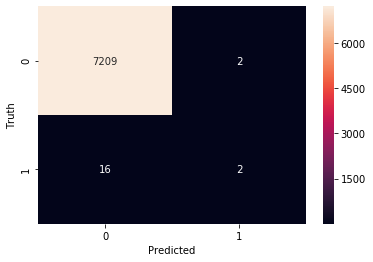

In [40]:
#plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='2g')
plt.xlabel("Predicted")
plt.ylabel('Truth')

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!


In [41]:
# Recall  = TP / (FN + TP)
# Precision = TP / (FP + TP)

In [42]:
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9975100290496611


In [43]:
print('Precision:' ,precision_score(y_test, model.predict(X_test)))

Precision: 0.5


In [44]:
print('Recall:' ,recall_score(y_test, model.predict(X_test)))

Recall: 0.1111111111111111


In [45]:
print('F1' ,f1_score(y_test, model.predict(X_test)))

F1 0.1818181818181818


Random Forest results:

    Accuracy: 0.9980633559275142
    Precision: 0.8333333333333334
    Recall: 0.2777777777777778
    F1 0.4166666666666667
    
Conclusion: model is overfitting as the possibility to get right 'no coup event' (high TP) is higher than saying there is a coup event (low TN). So, the accuracy is extremely higher than recall.

### Balance dataset

#### Random Oversampling 

Reason: Increase the TN to increase recall score (probability to an 'yes-coup')

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y) #50% stratify

In [106]:
# increase to 50% yes-coup event
oversample = RandomOverSampler(sampling_strategy=0.5)

In [107]:
X_over, y_over = oversample.fit_resample(X_train, y_train)
#X_over, y_over = oversample.fit_resample(X, y)

In [49]:
y_over.sum()/len(y_over)

0.3333333333333333

In [50]:
print(Counter(y_over))

Counter({0.0: 28836, 1.0: 14418})


In [51]:
model= RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
#model.fit(X_over, y_over)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
model.score(X_test, y_test)

0.9977866924885876

In [53]:
y_pred = model.predict(X_test)

In [54]:
cm = confusion_matrix (y_test, y_pred)
cm

array([[7207,    2],
       [  14,    6]], dtype=int64)

In [55]:
print(f'Recall: {7/(13+7)}')
print(f'Precision: {round(7/(2+7), 2)}')

Recall: 0.35
Precision: 0.78


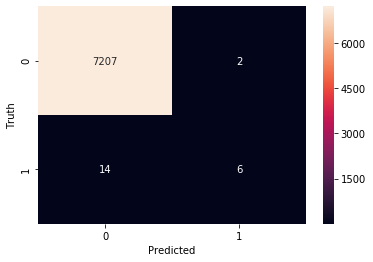

In [56]:
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel("Predicted")
plt.ylabel('Truth')
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!


In [57]:
print('F1' ,f1_score(y_test, model.predict(X_test)))

F1 0.4285714285714285


In [58]:
print('Precision:' ,precision_score(y_test, model.predict(X_test)))

Precision: 0.75


In [59]:
print('Recall:' ,recall_score(y_test, model.predict(X_test)))

Recall: 0.3


Random Forest with balanced dataset (50%) results:

    Accuracy: 0.998
    Precision: 0.7777777777777778
    Recall: 0.35
    F1 0.48275862068965514
 
Conclusion: Recall increased to 35%. So if we say there is a coup, we have 35% of being right. Accuracy has been kept higher and precision decreased as expected (recall increased - not all TP are really no-coup events)

### Logistic Regression for comparing the results from Random Forest Classification

In [108]:
lr = LogisticRegression()

In [109]:
lr.fit(X_over,y_over)

C:\Users\Viviam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
X_over_lr = X_over.copy() # copy of dataset to plot the predict_proba in item 6.4
X_lr = X.copy()

In [62]:
#Accuracy
lr.score(X_test, y_test)

0.9539355374187302

In [63]:
y_pred=lr.predict(X_test)

In [64]:
cm = confusion_matrix (y_test, y_pred)
cm

array([[6880,  329],
       [   4,   16]], dtype=int64)

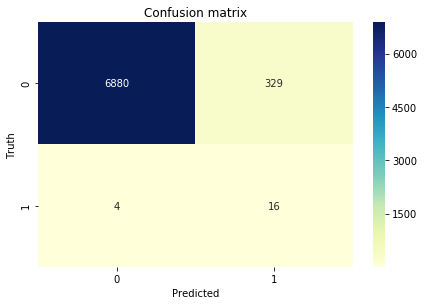

In [65]:
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel("Predicted")
plt.ylabel('Truth')
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!


In [66]:
print('F1' ,f1_score(y_test, lr.predict(X_test)))

F1 0.08767123287671232


In [67]:
print('Precision:' ,precision_score(y_test, lr.predict(X_test)))

Precision: 0.0463768115942029


In [68]:
print('Recall:' ,recall_score(y_test, lr.predict(X_test)))

Recall: 0.8


Logistic Regression Results:

    Accuracy: 0.9946050629409323
    Precision: 0.7142857142857143
    Recall: 0.95
    F1: 0.4935064935064935

### Thresholds for the model to consider a coup

Only coup attempts will be considered a coup above the thresholds

In [69]:
proba = lr.predict_proba(X_test)[:, 1]

In [70]:
#80% above
y_pred_prob80 = proba > 0.8 

In [71]:
print('F1' ,f1_score(y_test, y_pred_prob80))
print('Precision:' ,precision_score(y_test, y_pred_prob80))
print('Recall:' ,recall_score(y_test, y_pred_prob80))

F1 0.11659192825112107
Precision: 0.06403940886699508
Recall: 0.65


In [72]:
#90% above
y_pred_prob90 = proba > 0.9 
print('F1' ,f1_score(y_test, y_pred_prob90))
print('Precision:' ,precision_score(y_test, y_pred_prob90))
print('Recall:' ,recall_score(y_test, y_pred_prob90))

F1 0.1234567901234568
Precision: 0.07042253521126761
Recall: 0.5


In [73]:
confusion_matrix (y_test, y_pred_prob90)

array([[7077,  132],
       [  10,   10]], dtype=int64)

Conclusion: Threshold of > 90%, the model predicts 90% of the coups with a precision of 46% 

#### Important features from Logistic Regression

In [74]:
from sklearn.feature_selection import RFE

In [75]:
selector = RFE(lr, n_features_to_select=1)

In [76]:
selector.fit(X_train, y_train)

C:\Users\Viviam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Viviam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=1, step=1, verbose=0)

In [77]:
sorted(list(zip(selector.ranking_, X_train.columns)))

[(1, 'pt_attempt'),
 (2, 'delayed'),
 (3, 'defeat_recent'),
 (4, 'militarycareer'),
 (5, 'ref_recent'),
 (6, 'male'),
 (7, 'elected'),
 (8, 'prev_conflict'),
 (9, 'leg_ant'),
 (10, 'change_recent'),
 (11, 'nochange_recent'),
 (12, 'irregular'),
 (13, 'irreg_lead_ant'),
 (14, 'exec_ant'),
 (15, 'exec_recent'),
 (16, 'lead_recent'),
 (17, 'loss'),
 (18, 'victory_recent'),
 (19, 'indirect_recent'),
 (20, 'direct_recent'),
 (21, 'election_recent'),
 (22, 'lastelection'),
 (23, 'government'),
 (24, 'ref_ant'),
 (25, 'election_now'),
 (26, 'month'),
 (27, 'age'),
 (28, 'country_types'),
 (29, 'anticipation'),
 (30, 'tenure_months'),
 (31, 'year'),
 (32, 'leg_recent')]

Insights:

Top 3 features:

    1 - 'pt_attempt': coup attempt
    2 - 'delayed': delayed is equal to 1 in the six months following an election cancellation or delay of more than two weeks.
    3 - 'defeat_recent': defeat in the six months following a victory for the incumbent leader or incumbent political party.

### Feature Importance from Random Forest

In [78]:
feature_imp = model.feature_importances_

In [79]:
feature_imp

array([5.08337339e-02, 4.10096259e-02, 1.50175809e-02, 5.35806777e-02,
       8.83140828e-04, 1.28315745e-02, 6.64682896e-02, 2.89503331e-02,
       4.16428692e-03, 9.15161901e-04, 8.98485541e-04, 4.01497603e-03,
       2.21645486e-03, 7.87592248e-04, 2.09157868e-03, 3.25692079e-04,
       2.09355292e-03, 8.75785928e-04, 2.60545938e-03, 1.95314115e-03,
       4.13306698e-06, 2.17096922e-03, 2.08910304e-03, 1.07738132e-03,
       1.56872235e-03, 1.90004130e-03, 6.15293082e-02, 6.37075157e-02,
       5.56915227e-02, 1.23400705e-02, 4.59390372e-01, 4.60137363e-02])

In [80]:
sorted (list(zip(feature_imp, X.columns)), reverse=True)

[(0.4593903723320665, 'pt_attempt'),
 (0.0664682895600902, 'tenure_months'),
 (0.06370751568689004, 'loss'),
 (0.06152930817871984, 'lastelection'),
 (0.05569152267631254, 'irregular'),
 (0.053580677685696465, 'age'),
 (0.05083373392012811, 'year'),
 (0.046013736292204434, 'country_types'),
 (0.04100962589686772, 'month'),
 (0.028950333137798375, 'government'),
 (0.015017580879128144, 'elected'),
 (0.012831574467346039, 'militarycareer'),
 (0.012340070543387259, 'prev_conflict'),
 (0.004164286920348932, 'anticipation'),
 (0.004014976026172174, 'exec_ant'),
 (0.002605459375806706, 'ref_recent'),
 (0.00221645485594653, 'irreg_lead_ant'),
 (0.0021709692155644335, 'victory_recent'),
 (0.0020935529155564968, 'exec_recent'),
 (0.002091578684523688, 'election_recent'),
 (0.002089103040682327, 'defeat_recent'),
 (0.0019531411461796455, 'direct_recent'),
 (0.0019000413043664397, 'delayed'),
 (0.0015687223496703411, 'nochange_recent'),
 (0.0010773813170924032, 'change_recent'),
 (0.0009151619011

Insight:

top 3 features:

    1-  pt_attempt: attempt coup in a month
    2 - tenure_months: duration of the regime
    3 - loss: The number of months since the incumbent or incumbent political party last lost a competitive election, or, in the absence of previous losses, the number of months since the political system last changed

### General insights from features

 - Coup attempt is the most important variable (first place in both models). 
 
 - All features are related to a political regime at the time (duration, coup attempt, delayed or cancelled elections, unacceptable losses, etc).
 
 - Long-term regimes are not popular.
 
 - Math facts coincides with human facts.

- Recall and Precision had been improved (35% and 77% respectively)

### Dropping country type column

Try to generalize the model to be applied to Brazil's coup prediction and to improve it as well

In [81]:
africa_gov_replace.head()

,country,year,month,elected,age,male,militarycareer,tenure_months,government,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt,country_types
59006,Cape Verde,1975.0,7.0,0.0,41.0,1,0.0,1.0,14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.693147,0.693147,0.693147,0.0,0.0,0.0,7
59007,Cape Verde,1975.0,8.0,0.0,41.0,1,0.0,2.0,14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.098612,1.098612,1.098612,0.0,0.0,0.0,7
59008,Cape Verde,1975.0,9.0,0.0,41.0,1,0.0,3.0,14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.386294,1.386294,1.386294,0.0,0.0,0.0,7
59009,Cape Verde,1975.0,10.0,0.0,41.0,1,0.0,4.0,14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.609438,1.609438,1.609438,0.0,0.0,0.0,7
59010,Cape Verde,1975.0,11.0,0.0,41.0,1,0.0,5.0,14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.791760,1.791760,1.791760,0.0,0.0,0.0,7


In [82]:
X = africa_gov_replace.drop(['pt_suc','country','country_types'], axis=1)
y = africa_gov_replace['pt_suc']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [84]:
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [85]:
model= RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
#Accuracy
model.score(X_test, y_test)

0.9975100290496611

In [87]:
y_pred = model.predict(X_test)

In [88]:
cm = confusion_matrix (y_test, y_pred)
cm

array([[7206,    3],
       [  15,    5]], dtype=int64)

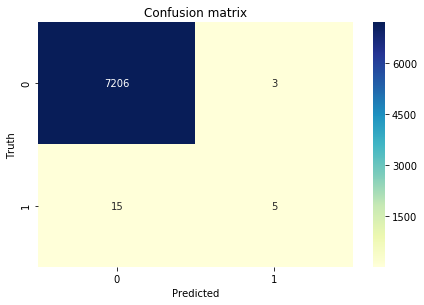

In [89]:
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel("Predicted")
plt.ylabel('Truth')
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!


In [90]:
print('F1' ,f1_score(y_test, model.predict(X_test)))

F1 0.35714285714285715


In [91]:
print('Precision:' ,precision_score(y_test, model.predict(X_test)))

Precision: 0.625


In [92]:
print('Recall:' ,recall_score(y_test, model.predict(X_test)))

Recall: 0.25


Dropping country_type column results:

    Accuracy: 0.9977866924885876
    Precision: 0.7
    Recall: 0.35
    F1: 0.4666666666666667
    
Insights: dropping country_types column reduced slightly F-1 score (48% to 46.6%). Overall, it didn't affect to much the previous model.

# Applying African model to predict a putsch in Brazil.

See if the ML African model works in other countries (e.g. Brazil)

Model used: step 5.1.7 (dropping country column)

## Extracting only Brazil from the dataset

In [93]:
brazil = df[(df['country'] == 'Brazil')]
brazil

,country,year,month,elected,age,male,militarycareer,tenure_months,government,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt
21047,Brazil,1950.0,1.0,1.0,65.0,1,1.0,49.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.891820,3.891820,3.891820,0.0,0.0,0.0
21048,Brazil,1950.0,2.0,1.0,65.0,1,1.0,50.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.912023,3.912023,3.912023,0.0,0.0,0.0
21049,Brazil,1950.0,3.0,1.0,65.0,1,1.0,51.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.931826,3.931826,3.931826,0.0,0.0,0.0
21050,Brazil,1950.0,4.0,1.0,65.0,1,1.0,52.0,Presidential Democracy,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.951244,3.951244,3.951244,0.0,0.0,0.0
21051,Brazil,1950.0,5.0,1.0,65.0,1,1.0,53.0,Presidential Democracy,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.970292,3.970292,3.970292,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21904,Brazil,2020.0,1.0,1.0,65.0,1,1.0,13.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.772589,2.772589,6.042633,0.0,0.0,0.0
21905,Brazil,2020.0,2.0,1.0,65.0,1,1.0,14.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.833213,2.833213,6.045005,0.0,0.0,0.0
21906,Brazil,2020.0,3.0,1.0,65.0,1,1.0,15.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.890372,2.890372,6.047372,0.0,0.0,0.0
21907,Brazil,2020.0,4.0,1.0,65.0,1,1.0,16.0,Presidential Democracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.944439,2.944439,6.049733,0.0,0.0,0.0


## Cleaning Brazil dataset

In [94]:
#Replace government column to numbers
brazil = brazil.replace({'Dominant Party' : 14, 'Parliamentary Democracy' : 13, 
                                        'Personal Dictatorship' : 12, 'Provisional - Civilian' : 11, 
                                        'Provisional - Military' : 10, 'Presidential Democracy':9,
                                       'Military': 8, 'Military-Personal': 7, 'Party-Personal':6,
                                       'Warlordism': 5, 'Party-Military': 4, 'Indirect Military': 3,
                                      'Monarchy': 2, 'Oligarchy': 1, 'Party-Personal-Military Hybrid':15 })
brazil.head()

,country,year,month,elected,age,male,militarycareer,tenure_months,government,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt
21047,Brazil,1950.0,1.0,1.0,65.0,1,1.0,49.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.891820,3.891820,3.891820,0.0,0.0,0.0
21048,Brazil,1950.0,2.0,1.0,65.0,1,1.0,50.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.912023,3.912023,3.912023,0.0,0.0,0.0
21049,Brazil,1950.0,3.0,1.0,65.0,1,1.0,51.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.931826,3.931826,3.931826,0.0,0.0,0.0
21050,Brazil,1950.0,4.0,1.0,65.0,1,1.0,52.0,9,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.951244,3.951244,3.951244,0.0,0.0,0.0
21051,Brazil,1950.0,5.0,1.0,65.0,1,1.0,53.0,9,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.970292,3.970292,3.970292,0.0,0.0,0.0


In [95]:
#Label encoder country column
label_encoder = preprocessing.LabelEncoder()
brazil['country_types'] = label_encoder.fit_transform(brazil['country'])

## Applying trained model

Considering probability threshold +90% (proba_90)

In [96]:
X_over.columns

Index(['year', 'month', 'elected', 'age', 'male', 'militarycareer',
       'tenure_months', 'government', 'anticipation', 'ref_ant', 'leg_ant',
       'exec_ant', 'irreg_lead_ant', 'election_now', 'election_recent',
       'leg_recent', 'exec_recent', 'lead_recent', 'ref_recent',
       'direct_recent', 'indirect_recent', 'victory_recent', 'defeat_recent',
       'change_recent', 'nochange_recent', 'delayed', 'lastelection', 'loss',
       'irregular', 'prev_conflict', 'pt_attempt'],
      dtype='object')

In [97]:
X_brazil = brazil[X_over.columns]



In [98]:
y_brazil_pred = model.predict(X_brazil)

In [99]:
# creating a Brazil csv copy
braza = brazil.copy()

In [100]:
# creating pred column
braza['pred'] = y_brazil_pred

In [101]:
# If had a coup 
braza[braza['pred']==1] 

,country,year,month,elected,age,male,militarycareer,tenure_months,government,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt,country_types,pred
21169,Brazil,1959.0,12.0,1.0,57.0,1,0.0,48.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.931826,3.931826,3.931826,0.0,0.0,1.0,0,1.0
21217,Brazil,1963.0,9.0,1.0,45.0,1,0.0,25.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.197225,3.583519,2.197225,0.0,0.0,1.0,0,1.0
21223,Brazil,1964.0,3.0,1.0,46.0,1,0.0,31.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.708050,3.737670,2.708050,0.0,1.0,1.0,0,1.0
21224,Brazil,1964.0,4.0,1.0,46.0,1,0.0,32.0,9,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.761200,0.000000,0.0,1.0,1.0,0,1.0


In [102]:
braza[braza['pred']==0]

,country,year,month,elected,age,male,militarycareer,tenure_months,government,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt,country_types,pred
21047,Brazil,1950.0,1.0,1.0,65.0,1,1.0,49.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.891820,3.891820,3.891820,0.0,0.0,0.0,0,0.0
21048,Brazil,1950.0,2.0,1.0,65.0,1,1.0,50.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.912023,3.912023,3.912023,0.0,0.0,0.0,0,0.0
21049,Brazil,1950.0,3.0,1.0,65.0,1,1.0,51.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.931826,3.931826,3.931826,0.0,0.0,0.0,0,0.0
21050,Brazil,1950.0,4.0,1.0,65.0,1,1.0,52.0,9,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.951244,3.951244,3.951244,0.0,0.0,0.0,0,0.0
21051,Brazil,1950.0,5.0,1.0,65.0,1,1.0,53.0,9,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.970292,3.970292,3.970292,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21904,Brazil,2020.0,1.0,1.0,65.0,1,1.0,13.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.772589,2.772589,6.042633,0.0,0.0,0.0,0,0.0
21905,Brazil,2020.0,2.0,1.0,65.0,1,1.0,14.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.833213,2.833213,6.045005,0.0,0.0,0.0,0,0.0
21906,Brazil,2020.0,3.0,1.0,65.0,1,1.0,15.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.890372,2.890372,6.047372,0.0,0.0,0.0,0,0.0
21907,Brazil,2020.0,4.0,1.0,65.0,1,1.0,16.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.944439,2.944439,6.049733,0.0,0.0,0.0,0,0.0


Insights:

- African model worked well to Brazil as it predicted Brazil historical events correctly:
   - 12/1959: Aragarças's revolt (coup attempt)
   - 09/1963: Sargent's Revolt (possible coup)
   - 03/1964: Military Coup of 1964
   - 04/1964: Beginning of military regime in Brazil.
- All coups involved military 

## Probability of having a coup today in Brazil (05/2019)

In [112]:
X_brazil = brazil[X_over_lr.columns]

In [113]:
#all rows of column 1 (1 = had a coup)
# lr = logistic regression model

proba_brazil = lr.predict_proba(X_brazil)[:, 1] 

In [114]:
braza['proba'] = proba_brazil

In [115]:
braza

,country,year,month,elected,age,male,militarycareer,tenure_months,government,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt,country_types,pred,proba
21047,Brazil,1950.0,1.0,1.0,65.0,1,1.0,49.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.891820,3.891820,3.891820,0.0,0.0,0.0,0,0.0,0.009882
21048,Brazil,1950.0,2.0,1.0,65.0,1,1.0,50.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.912023,3.912023,3.912023,0.0,0.0,0.0,0,0.0,0.007032
21049,Brazil,1950.0,3.0,1.0,65.0,1,1.0,51.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.931826,3.931826,3.931826,0.0,0.0,0.0,0,0.0,0.004999
21050,Brazil,1950.0,4.0,1.0,65.0,1,1.0,52.0,9,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.951244,3.951244,3.951244,0.0,0.0,0.0,0,0.0,0.020793
21051,Brazil,1950.0,5.0,1.0,65.0,1,1.0,53.0,9,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.970292,3.970292,3.970292,0.0,0.0,0.0,0,0.0,0.014840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21904,Brazil,2020.0,1.0,1.0,65.0,1,1.0,13.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.772589,2.772589,6.042633,0.0,0.0,0.0,0,0.0,0.000041
21905,Brazil,2020.0,2.0,1.0,65.0,1,1.0,14.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.833213,2.833213,6.045005,0.0,0.0,0.0,0,0.0,0.000032
21906,Brazil,2020.0,3.0,1.0,65.0,1,1.0,15.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.890372,2.890372,6.047372,0.0,0.0,0.0,0,0.0,0.000025
21907,Brazil,2020.0,4.0,1.0,65.0,1,1.0,16.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.944439,2.944439,6.049733,0.0,0.0,0.0,0,0.0,0.000019


### Plot and insights

#### Brazil

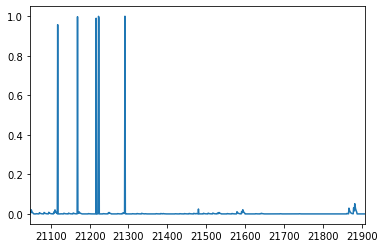

In [116]:
# plot to see the yes or no coup ocurrence
braza['proba'].plot()

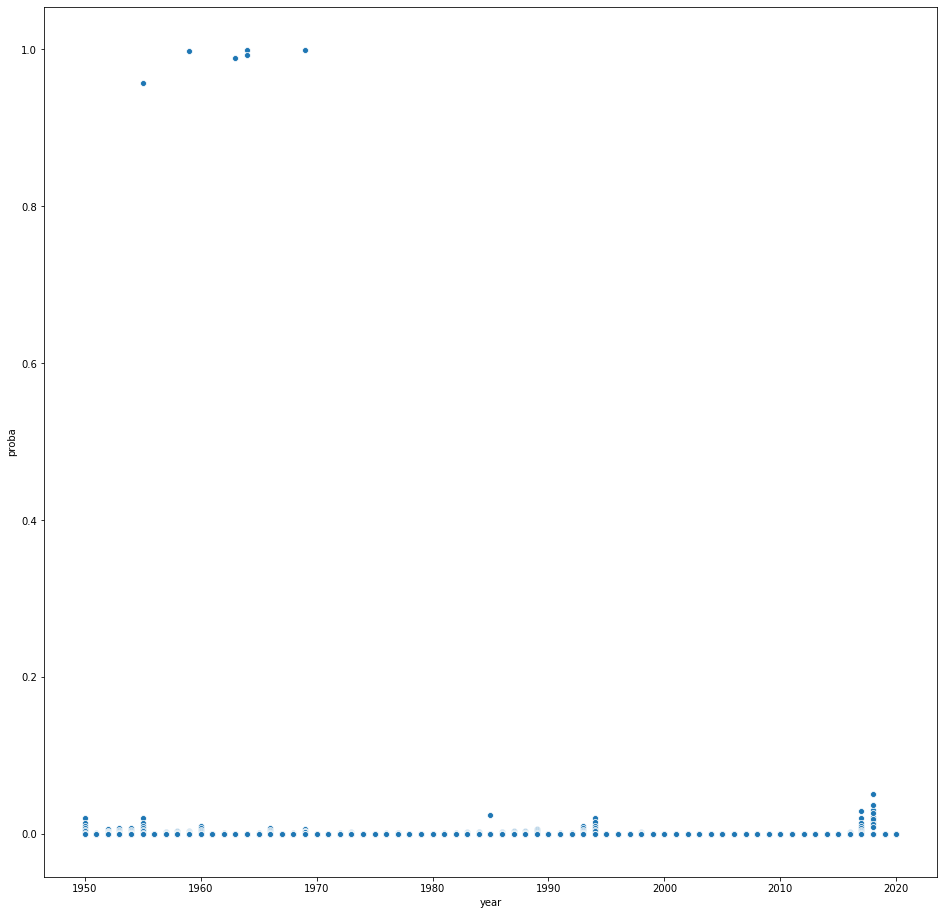

In [133]:

plt.figure(figsize=(16,16))

sns.scatterplot(x=braza['year'], y=braza['proba'])

Insights:
    
    - Getulio Vargas suicide and other dots: below 90% threshold
    - Dilma's impeachment: almost 0% of chance of being a coup

#### Africa

In [121]:
africa_pred = lr.predict_proba(X_lr)[:,1]

In [122]:
africa_para_plot = X_lr.copy()

In [123]:
africa_para_plot['pred'] = africa_pred

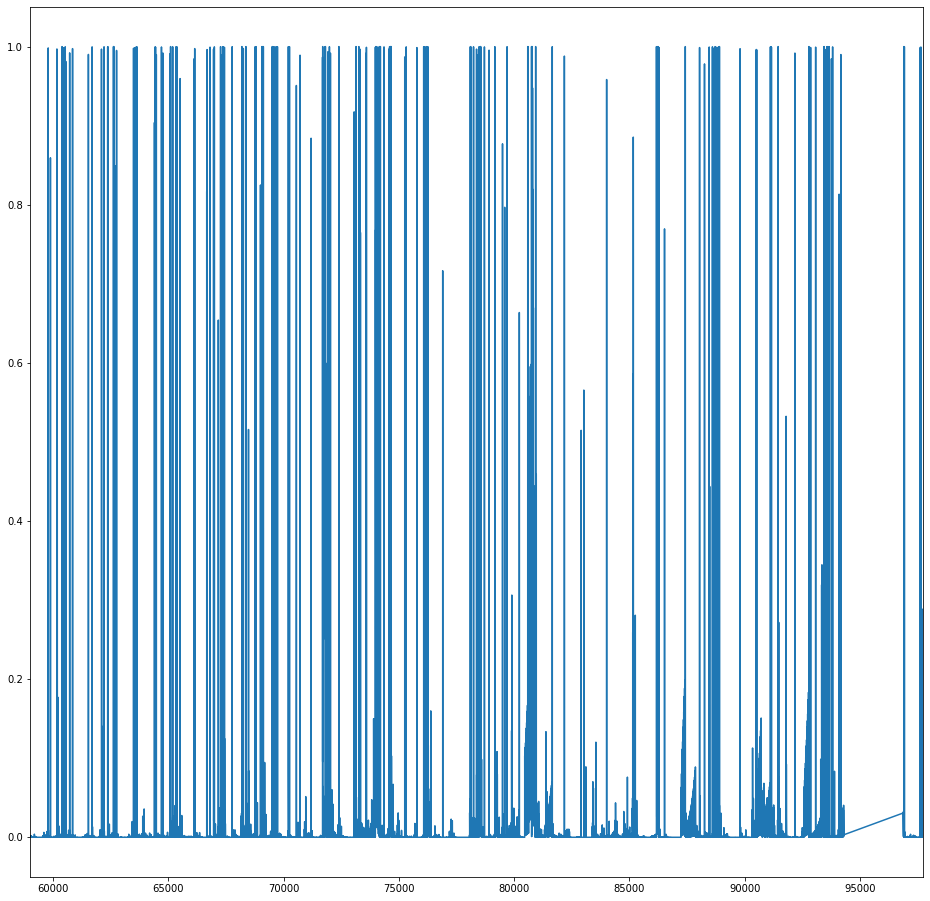

In [127]:
africa_para_plot.pred.plot(figsize=(16,16))

Insight: majority of the dots are surpassed 90% threshold